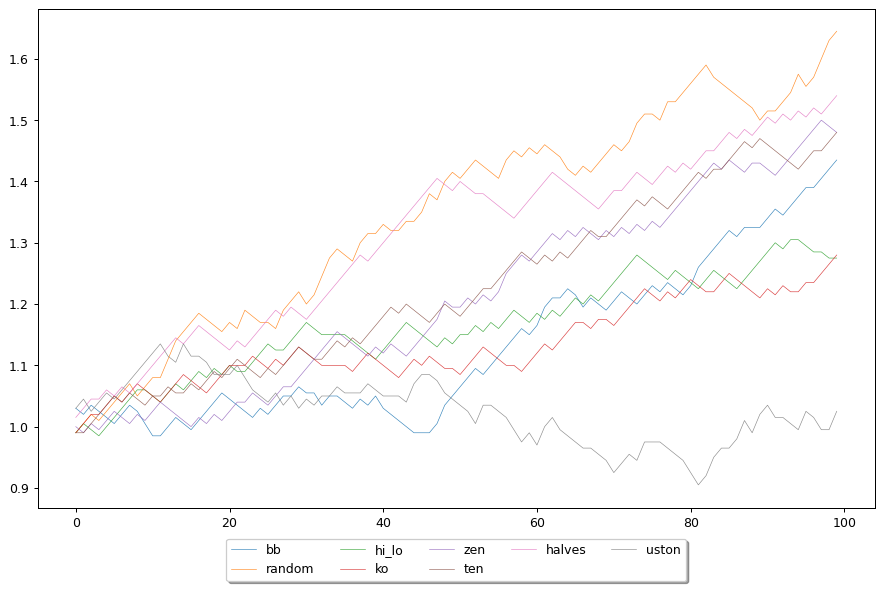

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df_import = pd.read_csv('running_balance.csv')
names = [
    "bb",
    "random",
    "hi_lo",
    "ko",
    "zen",
    "ten",
    "halves",
    "uston"
]

def plot_running_balance(df_balance: pd.DataFrame, names: list[str]) -> None:
    fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=90)

    for name in names:
        df_balance[name][0:100].plot(ax=ax, label=name, alpha=0.9, linewidth=0.5)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

plot_running_balance(df_import, names)